# Building the Gravitational Waves Catalog

In this notebook, we will cataloge the detected gravitational events using data
provided by https://gw-openscience.org from the Livingston (L1) and Hanford (H1)
detectors.

**Summary**

We will download cataloged events by the GWOSC and their strain datasets from
Livingston and Hanford detectors ("class 1"). Then we will crop the strains
around [-16s, 16s] centered at the event timestamp and save them to a file.

## Setup

In [91]:
import importlib
import os
import pickle

from itertools import groupby
from pathlib import Path

import pandas as pd
import numpy as np

from gwosc import datasets
from gwpy.timeseries import TimeSeries

In [98]:
# Local imports
import utils

import conf

importlib.reload(conf)
importlib.reload(utils)

pass

## Downloading detected event strains

In [102]:
# Prepare a list of events

blacklist = {"GW190424_180648", "GW190425", "GW190620_030421",
             "GW190630_185205", "GW190708_232457", "GW190910_112807",
             "GW190925_232845", "GW191216_213338", "GW200105",
             "GW200112_155838", "GW200302_015811"} # corrupted data

all_events = utils.get_all_events()
all_events = [e for e in all_events
              if not any(e.startswith(b) for b in blacklist)]

all_events[0:4], len(all_events)

(['GW150914-v1', 'GW151012-v1', 'GW151226-v1', 'GW170104-v1'], 88)

In [103]:
# Prepare a catalogue DataFrame
catalog = pd.DataFrame()

catalog["event"] = all_events
catalog["timestamp"] = catalog["event"].apply(datasets.event_gps)

In [104]:
# We now download the Strain Data around the timestamp.

h1_files = []
l1_files = []

for i, row in catalog.iterrows():
  print("Downloading strain for event", i, ":", row["event"])
  h1_file, l1_file = utils.fetch_strains(row["timestamp"], conf.EVENTS_DIR)
  
  h1_files.append(h1_file)
  l1_files.append(l1_file)

catalog["h1_strain"] = h1_files
catalog["l1_strain"] = l1_files

['H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5', 'L-L1_GWOSC_4KHZ_R1-1126257415-4096.hdf5']
['H-H1_GWOSC_4KHZ_R1-1128676853-4096.hdf5', 'L-L1_GWOSC_4KHZ_R1-1128676853-4096.hdf5']
['H-H1_GWOSC_4KHZ_R1-1135134303-4096.hdf5', 'L-L1_GWOSC_4KHZ_R1-1135134303-4096.hdf5']
['H-H1_GWOSC_4KHZ_R1-1167557889-4096.hdf5', 'L-L1_GWOSC_4KHZ_R1-1167557889-4096.hdf5']
['H-H1_GWOSC_4KHZ_R1-1180920447-4096.hdf5', 'L-L1_GWOSC_4KHZ_R1-1180920447-4096.hdf5']
['H-H1_GWOSC_4KHZ_R1-1185387760-4096.hdf5', 'L-L1_GWOSC_4KHZ_R1-1185387760-4096.hdf5']
['H-H1_GWOSC_4KHZ_R1-1186300472-4096.hdf5', 'L-L1_GWOSC_4KHZ_R1-1186300472-4096.hdf5']
['H-H1_GWOSC_4KHZ_R1-1186739814-4096.hdf5', 'L-L1_GWOSC_4KHZ_R1-1186739814-4096.hdf5']
['H-H1_GWOSC_4KHZ_R1-1187006835-4096.hdf5', 'L-L1_GWOSC_4KHZ_R1-1187006835-4096.hdf5']
['H-H1_GWOSC_4KHZ_R1-1187056280-4096.hdf5', 'L-L1_GWOSC_4KHZ_R1-1187056280-4096.hdf5']
['H-H1_GWOSC_4KHZ_R1-1187527209-4096.hdf5', 'L-L1_GWOSC_4KHZ_R1-1187527209-4096.hdf5']
['H-H1_GWOSC_4KHZ_R1-1238301690-4096.hdf5',

In [105]:
# Save catalog to file
catalog.to_csv(conf.DATA_DIR / "catalog.csv", index=False)

# If you have already saved the catalog, run the next line instead
# catalog = pd.read_csv(DATA_DIR / "catalog.csv")

In [106]:
catalog

,event,timestamp,h1_strain,l1_strain
0,GW150914-v1,1.126259e+09,data/strains/events/H-H1_GWOSC_4KHZ_R1-1126257...,data/strains/events/L-L1_GWOSC_4KHZ_R1-1126257...
1,GW151012-v1,1.128679e+09,data/strains/events/H-H1_GWOSC_4KHZ_R1-1128676...,data/strains/events/L-L1_GWOSC_4KHZ_R1-1128676...
2,GW151226-v1,1.135136e+09,data/strains/events/H-H1_GWOSC_4KHZ_R1-1135134...,data/strains/events/L-L1_GWOSC_4KHZ_R1-1135134...
3,GW170104-v1,1.167560e+09,data/strains/events/H-H1_GWOSC_4KHZ_R1-1167557...,data/strains/events/L-L1_GWOSC_4KHZ_R1-1167557...
4,GW170608-v1,1.180922e+09,data/strains/events/H-H1_GWOSC_4KHZ_R1-1180920...,data/strains/events/L-L1_GWOSC_4KHZ_R1-1180920...
...,...,...,...,...
83,GW200306_093714-v1,1.267523e+09,data/strains/events/H-H1_GWOSC_4KHZ_R1-1267520...,data/strains/events/L-L1_GWOSC_4KHZ_R1-1267520...
84,GW200308_173609-v1,1.267724e+09,data/strains/events/H-H1_GWOSC_4KHZ_R1-1267722...,data/strains/events/L-L1_GWOSC_4KHZ_R1-1267722...
85,GW200311_115853-v1,1.267963e+09,data/strains/events/H-H1_GWOSC_4KHZ_R1-1267961...,data/strains/events/L-L1_GWOSC_4KHZ_R1-1267961...
86,GW200316_215756-v1,1.268431e+09,data/strains/events/H-H1_GWOSC_4KHZ_R1-1268429...,data/strains/events/L-L1_GWOSC_4KHZ_R1-1268429...


# Cropping downloaded files

Each of the downloaded files is 4096 seconds long, which we will crop to `[-dt, +dt]`-long epochs.

In [107]:
event_epochs = []

In [108]:
for i, row in catalog.iterrows():
  event = row["event"]
  timestamp = row["timestamp"]

  print(f"Processing event {i}/{len(catalog)}", event)

  start, end = row["timestamp"] - conf.dT, row["timestamp"] + conf.dT

  h1 = TimeSeries.read(Path(row["h1_strain"]), format='hdf5.losc')
  l1 = TimeSeries.read(Path(row["l1_strain"]), format='hdf5.losc')

  h1_ts = h1.crop(start, end, copy=True)
  l1_ts = l1.crop(start, end, copy=True)

  del h1, l1

  event_epochs.append([h1_ts, l1_ts])

Processing event 0/88 GW150914-v1
Processing event 1/88 GW151012-v1
Processing event 2/88 GW151226-v1
Processing event 3/88 GW170104-v1
Processing event 4/88 GW170608-v1
Processing event 5/88 GW170729-v1
Processing event 6/88 GW170809-v1
Processing event 7/88 GW170814-v1
Processing event 8/88 GW170817-v1
Processing event 9/88 GW170818-v1
Processing event 10/88 GW170823-v1
Processing event 11/88 GW190403_051519-v1
Processing event 12/88 GW190408_181802-v1
Processing event 13/88 GW190412-v1
Processing event 14/88 GW190412_053044-v4
Processing event 15/88 GW190413_052954-v1
Processing event 16/88 GW190413_134308-v1
Processing event 17/88 GW190421_213856-v1
Processing event 18/88 GW190426_152155-v1
Processing event 19/88 GW190426_190642-v1
Processing event 20/88 GW190503_185404-v1
Processing event 21/88 GW190512_180714-v1
Processing event 22/88 GW190513_205428-v1
Processing event 23/88 GW190514_065416-v1
Processing event 24/88 GW190517_055101-v1
Processing event 25/88 GW190519_153544-v1
Pr

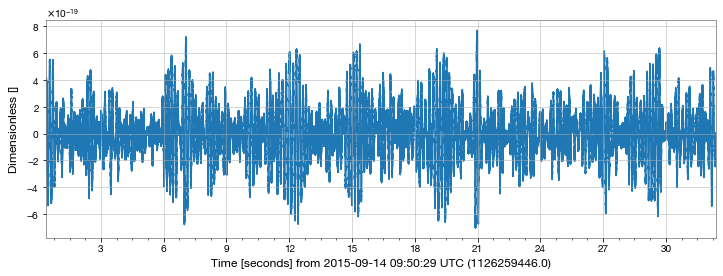

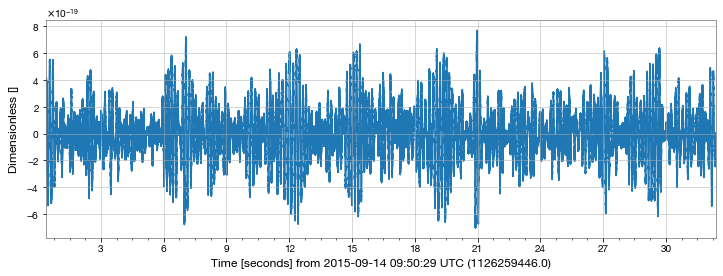

In [109]:
# Sample event

event_epochs[0][0].plot()

In [110]:
with (conf.DATA_DIR / "events.npy").open("wb") as f:
  pickle.dump(event_epochs, f)

In [111]:
len(event_epochs)

88